<a href="https://colab.research.google.com/github/Sanjeet2835/Classification---ML/blob/main/Gradient_Descent_Algorithm_in_Logisitic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
from sklearn.datasets import make_classification

In [66]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_classes=2, n_clusters_per_class=1, hypercube=False, random_state=41,
                           class_sep=20, n_redundant=0)

In [67]:
import matplotlib.pyplot as plt

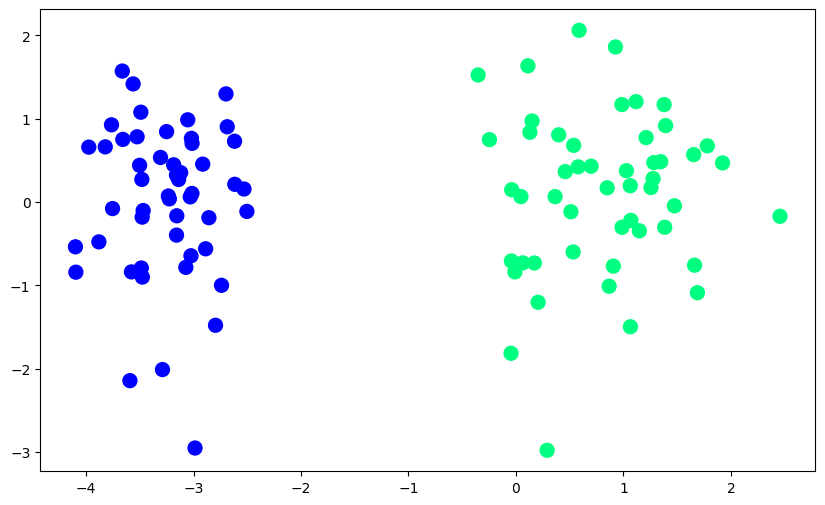

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [69]:
def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(10000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

In [70]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [71]:
coef_,intercept_ = gd(X,y)

In [72]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [73]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

In [74]:
#using scikit learn
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(solver='sag')
lor.fit(X,y)
print(lor.coef_)
print(lor.intercept_)
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1

[[2.36704111 0.02175958]]
[3.13744999]


(-3.0, 2.0)

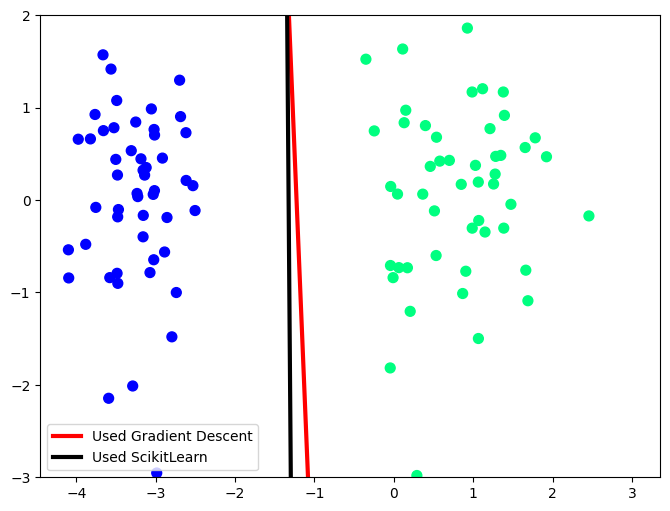

In [75]:
plt.figure(figsize=(8,6))
plt.plot(x_input,y_input,color='red',linewidth=3, label='Used Gradient Descent')
plt.plot(x_input1,y_input1,color='black',linewidth=3, label='Used ScikitLearn')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=50)
plt.legend()
plt.ylim(-3,2)